In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# 1

df = pd.read_csv("Car_sales.csv")
print("Number of samples before dropping NaN values:",len(df))
df = df.dropna().reset_index(drop=True)
print("Number of samples after dropping NaN values:",len(df))

Number of samples before dropping NaN values: 157
Number of samples after dropping NaN values: 117


In [3]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
3,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
4,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
113,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
114,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
115,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372



K = 1
Number of samples in cluster 1 is: 117


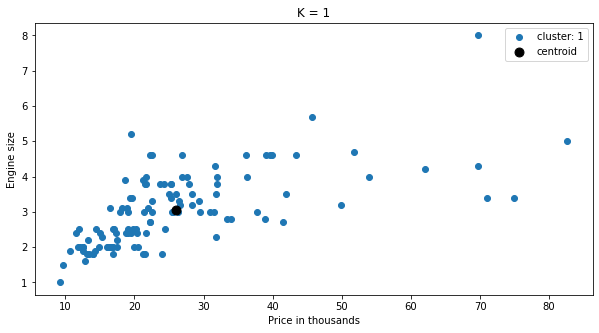


K = 2
Number of samples in cluster 1 is: 99
Number of samples in cluster 2 is: 18


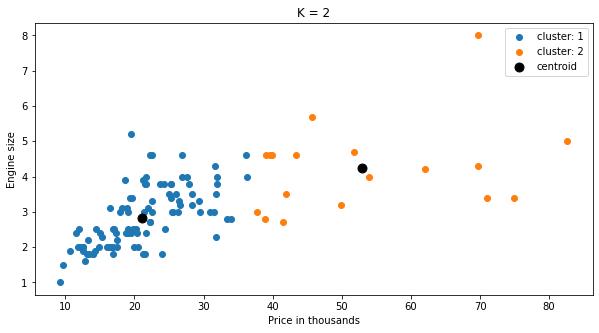


K = 3
Number of samples in cluster 1 is: 70
Number of samples in cluster 3 is: 38
Number of samples in cluster 2 is: 9


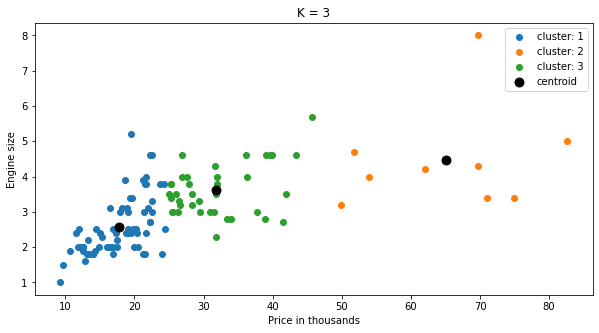


K = 4
Number of samples in cluster 1 is: 52
Number of samples in cluster 4 is: 45
Number of samples in cluster 2 is: 14
Number of samples in cluster 3 is: 6


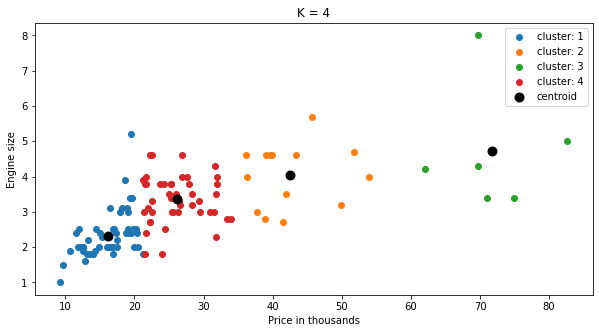


K = 5
Number of samples in cluster 5 is: 36
Number of samples in cluster 1 is: 34
Number of samples in cluster 4 is: 27
Number of samples in cluster 2 is: 14
Number of samples in cluster 3 is: 6


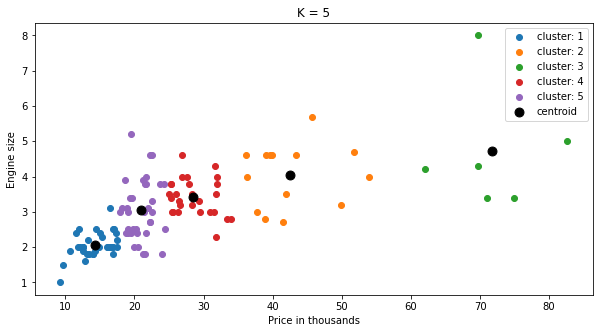


K = 6
Number of samples in cluster 5 is: 36
Number of samples in cluster 3 is: 34
Number of samples in cluster 1 is: 27
Number of samples in cluster 4 is: 11
Number of samples in cluster 6 is: 5
Number of samples in cluster 2 is: 4


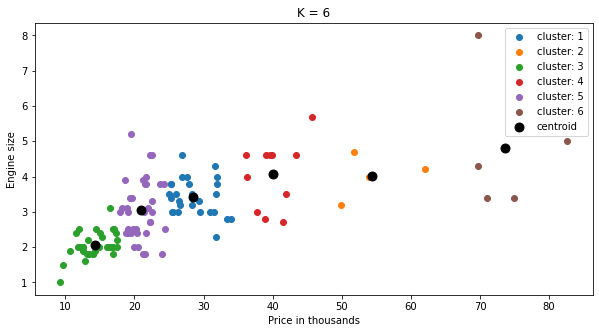


K = 7
Number of samples in cluster 1 is: 31
Number of samples in cluster 7 is: 30
Number of samples in cluster 5 is: 21
Number of samples in cluster 4 is: 15
Number of samples in cluster 6 is: 11
Number of samples in cluster 2 is: 5
Number of samples in cluster 3 is: 4


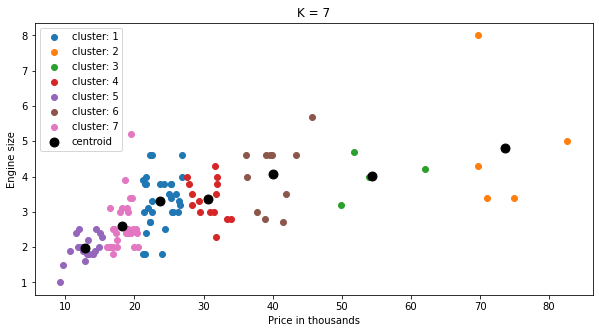

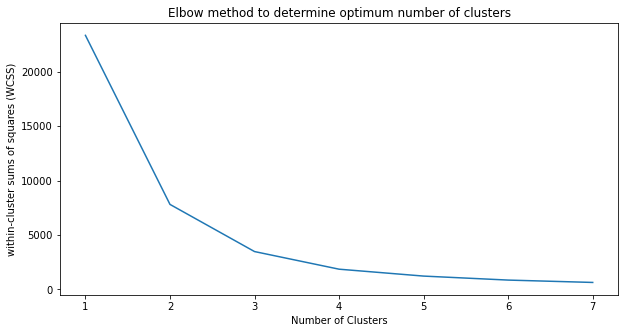

In [4]:
# 2

sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    label = kmeans.fit_predict(df[['Price_in_thousands','Engine_size']])
    u_labels = np.unique(label)
    df["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    num_elements = df['clusters'].value_counts().to_numpy()
    clusters = df['clusters'].value_counts().index.to_numpy()
    
    print("\nK =", k)
    for i in range(len(num_elements)):
        print("Number of samples in cluster", clusters[i]+1, "is:", num_elements[i])
    
    plt.figure(figsize=(10,5))
    plt.title("K = " + str(k))
    for i in u_labels:
        plt.scatter(df[df["clusters"] == i]['Price_in_thousands'], 
                    df[df["clusters"] == i]['Engine_size'],
                    label="cluster: "+ str(i+1))
    plt.xlabel("Price in thousands")
    plt.ylabel("Engine size")
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k',label='centroid')
    plt.legend()
    plt.show()
    
    df.drop(columns=['clusters'],inplace=True)
    
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()


K = 1
Number of samples in cluster 1 is: 117


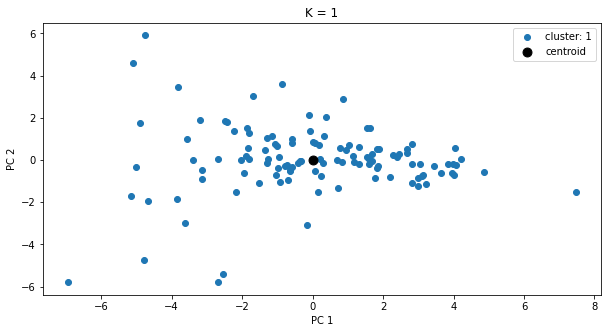


K = 2
Number of samples in cluster 2 is: 61
Number of samples in cluster 1 is: 56


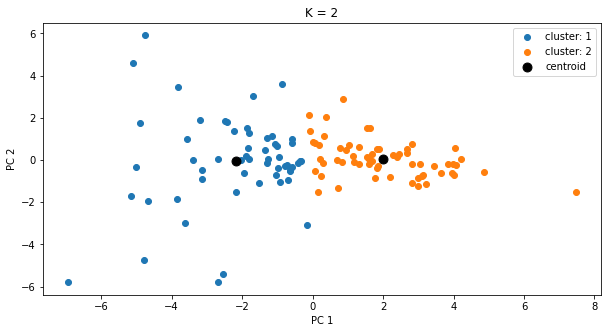


K = 3
Number of samples in cluster 1 is: 57
Number of samples in cluster 2 is: 51
Number of samples in cluster 3 is: 9


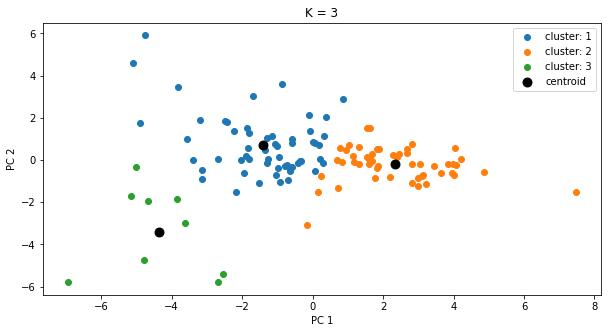


K = 4
Number of samples in cluster 4 is: 51
Number of samples in cluster 2 is: 40
Number of samples in cluster 1 is: 18
Number of samples in cluster 3 is: 8


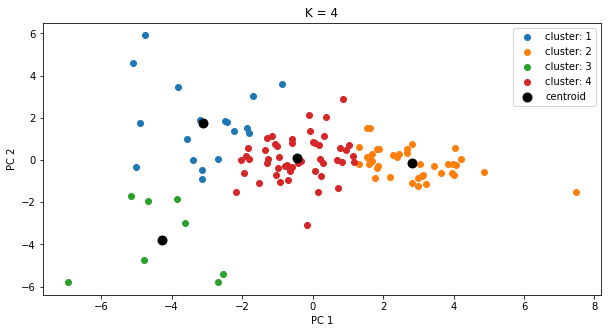


K = 5
Number of samples in cluster 1 is: 36
Number of samples in cluster 3 is: 34
Number of samples in cluster 2 is: 26
Number of samples in cluster 5 is: 12
Number of samples in cluster 4 is: 9


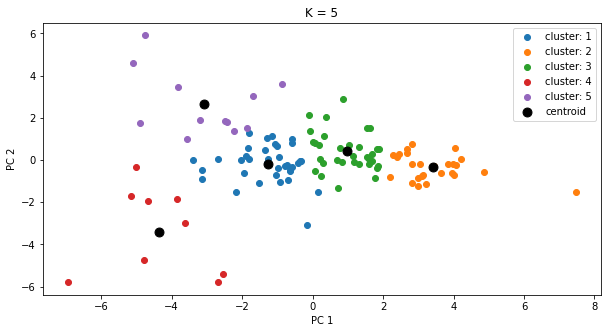


K = 6
Number of samples in cluster 3 is: 35
Number of samples in cluster 5 is: 34
Number of samples in cluster 2 is: 26
Number of samples in cluster 1 is: 10
Number of samples in cluster 6 is: 8
Number of samples in cluster 4 is: 4


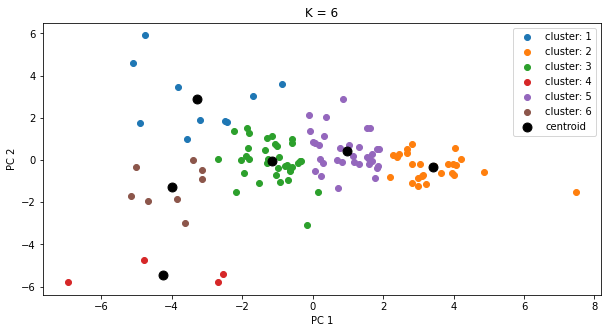


K = 7
Number of samples in cluster 4 is: 28
Number of samples in cluster 6 is: 27
Number of samples in cluster 5 is: 23
Number of samples in cluster 2 is: 19
Number of samples in cluster 1 is: 11
Number of samples in cluster 3 is: 5
Number of samples in cluster 7 is: 4


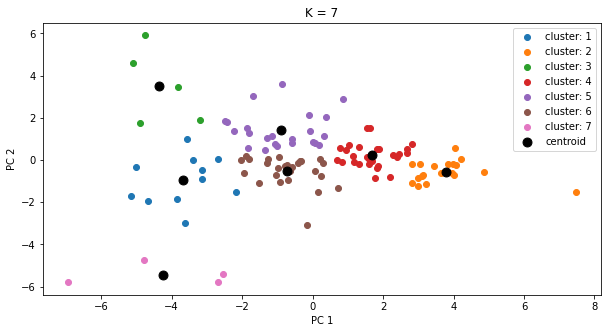

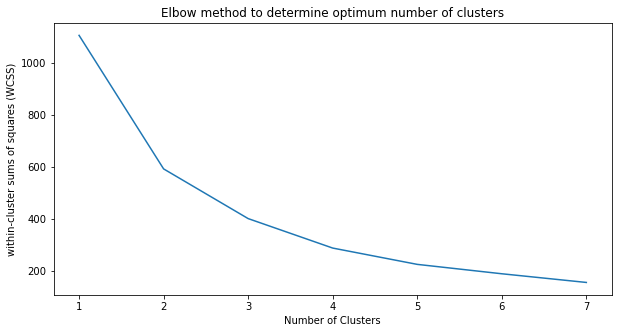

In [5]:
# 3

# Need to drop manufacturer column as well
df.drop(columns=["Manufacturer","Model", "Vehicle_type", "Latest_Launch"], inplace=True)
# Standardize data
data_norm = StandardScaler().fit_transform(df.values)

pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(data_norm)

df_pca = pd.DataFrame(data = pcaComponents,
             columns = ['1_PC', '2_PC'])

sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    label = kmeans.fit_predict(df_pca[['1_PC','2_PC']])
    u_labels = np.unique(label)
    df_pca["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    num_elements = df_pca['clusters'].value_counts().to_numpy()
    clusters = df_pca['clusters'].value_counts().index.to_numpy()
    
    print("\nK =", k)
    for i in range(len(num_elements)):
        print("Number of samples in cluster", clusters[i]+1, "is:", num_elements[i])
    
    plt.figure(figsize=(10,5))
    plt.title("K = " + str(k))
    for i in u_labels:
        plt.scatter(df_pca[df_pca["clusters"] == i]['1_PC'], 
                    df_pca[df_pca["clusters"] == i]['2_PC'],
                    label="cluster: "+ str(i+1))
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k',label='centroid')
    plt.legend()
    plt.show()
    
    df_pca.drop(columns=['clusters'],inplace=True)
    
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()